## poisson intervals distribution

mean:9934
max:126708
[np.float64(8255.0), np.float64(5849.0), np.float64(3710.0), np.float64(40570.0), np.float64(2040.0), np.float64(4739.0), np.float64(4807.0), np.float64(6842.0), np.float64(8222.0), np.float64(4020.0), np.float64(429.0), np.float64(13607.0), np.float64(34187.0), np.float64(4904.0), np.float64(195.0), np.float64(13858.0), np.float64(4104.0), np.float64(42019.0), np.float64(6771.0), np.float64(482.0), np.float64(6294.0), np.float64(53011.0), np.float64(434.0), np.float64(8366.0), np.float64(206.0), np.float64(4699.0), np.float64(116.0), np.float64(3701.0), np.float64(3223.0), np.float64(19249.0), np.float64(16487.0), np.float64(9504.0), np.float64(27083.0), np.float64(1405.0), np.float64(56852.0), np.float64(404.0), np.float64(2877.0), np.float64(19680.0), np.float64(685.0), np.float64(1718.0), np.float64(15282.0), np.float64(1003.0), np.float64(6168.0), np.float64(2416.0), np.float64(2115.0), np.float64(11139.0), np.float64(12934.0), np.float64(43153.0), np.float64(

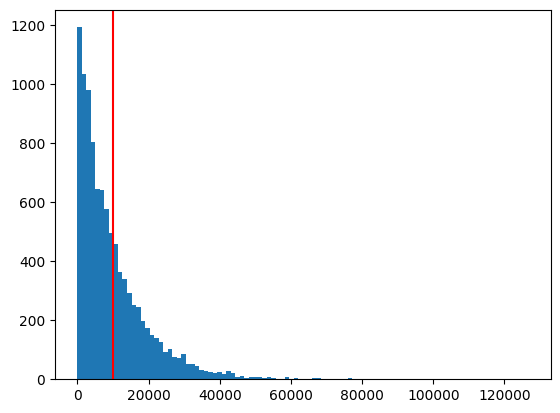

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

stepsLenght = []
for i in range(10000):
    roll= np.ceil(np.random.exponential(10000))
    stepsLenght.append(roll)
    # print(roll)

stepsPos = [0] * len(stepsLenght)
        
for i in range(len(stepsLenght)):
    if(i == 0):
        stepsPos[0] = 100
    else:
        stepsPos[i] = stepsPos[i-1] + stepsLenght[i]

plt.hist(stepsLenght,100)
plt.axvline(np.mean(stepsLenght), color='red')
print("mean:" + str(int(np.mean(stepsLenght))) +"\nmax:" + str(int(np.max(stepsLenght))))
print(stepsLenght)
print(stepsPos)

#sns.distplot(np.random.exponential(size=1000000), hist=True)


# test #1

## normal

### U vs Pos

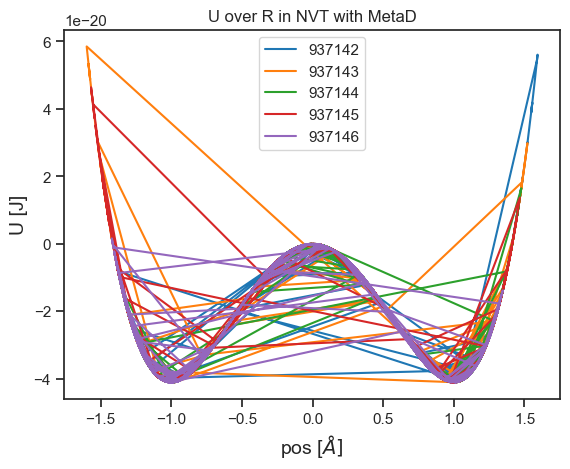

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

for i, seedNum in enumerate([937142, 937143, 937144, 937145, 937146]):
    df = pd.read_csv("simForMetaD_low" + str(i) + ".log", sep='\s+')
    xyz = open("SimForMetaD_low" + str(i) + ".xyz", 'r')
    posX, posY, posZ, time = ([] for i in range(4))
    count = 0
    for i in xyz:
        line = i.split()
        if(count % 3 == 1):
            time.append(line[1])
        elif(count % 3 == 2):
            posX.append(float(line[1]))
            posY.append(float(line[2]))
            posZ.append(float(line[3]))
        count += 1
    xyz.close()
    plt.plot(posX, df['U'], label= seedNum)

# for i in range(1, len(posX)):
#     if(posX[i -1] * posX[i] < 0):
#         print(time[i])

plt.title("U over R in NVT with MetaD")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")

plt.legend()
plt.show()



### pos vs time

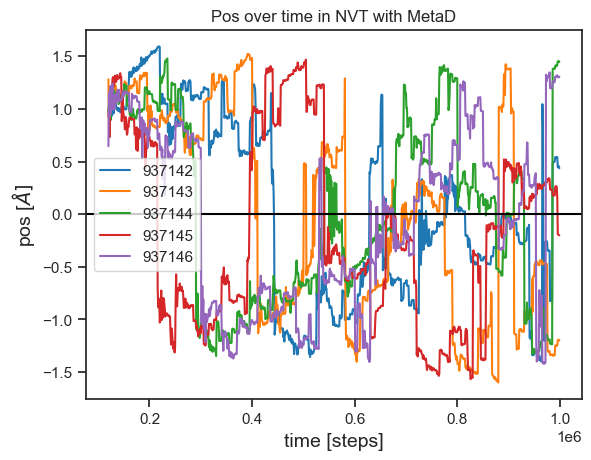

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

for i, seedNum in enumerate([937142, 937143, 937144, 937145, 937146]):
    xyz = open("SimForMetaD_low" + str(i) + ".xyz", 'r')
    posX, posY, posZ, time = ([] for i in range(4))
    count = 0
    for i in xyz:
        line = i.split()
        if(count % 3 == 1):
            time.append(float(line[1]))
        elif(count % 3 == 2):
            posX.append(float(line[1]))
            # posY.append(float(line[2]))
            # posZ.append(float(line[3]))
        count += 1
    xyz.close()
    plt.plot(time, posX, label= seedNum)

# for i in range(1, len(posX)):
#     if(posX[i -1] * posX[i] < 0):
#         print(time[i])

plt.title("Pos over time in NVT with MetaD")
plt.xlabel("time [steps]")
plt.ylabel(r"pos [$\AA ]$")
plt.axhline(0, color='black')

plt.legend() 

## with Poisson distribution

### U vs pos

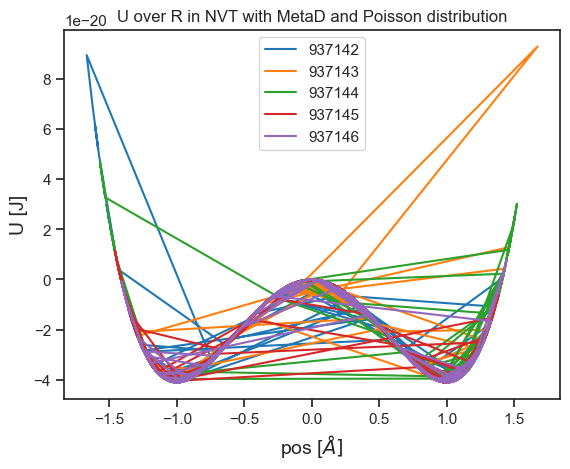

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

for i, seedNum in enumerate([937142, 937143, 937144, 937145, 937146]):
    df = pd.read_csv("simForMetaD_lowWithDist" + str(i) + ".log", sep='\s+')
    xyz = open("SimForMetaD_lowWithDist" + str(i) + ".xyz", 'r')
    posX, posY, posZ, time = ([] for i in range(4))
    count = 0
    for i in xyz:
        line = i.split()
        if(count % 3 == 1):
            time.append(line[1])
        elif(count % 3 == 2):
            posX.append(float(line[1]))
            posY.append(float(line[2]))
            posZ.append(float(line[3]))
        count += 1
    xyz.close()
    plt.plot(posX, df['U'], label=seedNum)

# for i in range(1, len(posX)):
#     if(posX[i -1] * posX[i] < 0):
#         print(time[i])

plt.title("U over R in NVT with MetaD and Poisson distribution")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")
plt.legend()


### pos vs time

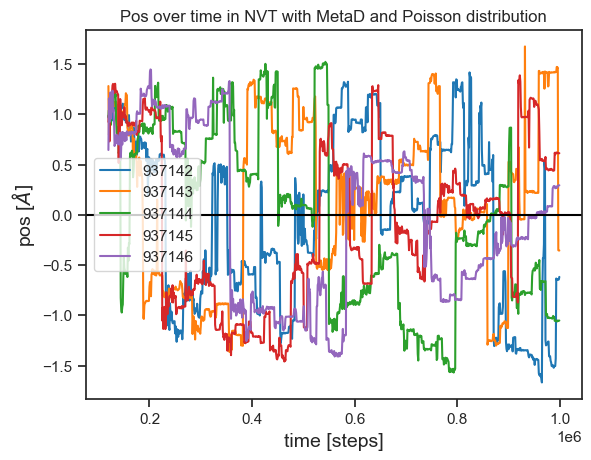

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

for i, seedNum in enumerate([937142, 937143, 937144, 937145, 937146]):
    xyz = open("SimForMetaD_lowWithDist" + str(i) + ".xyz", 'r')
    posX, posY, posZ, time = ([] for i in range(4))
    count = 0
    for i in xyz:
        line = i.split()
        if(count % 3 == 1):
            time.append(float(line[1]))
        elif(count % 3 == 2):
            posX.append(float(line[1]))
            # posY.append(float(line[2]))
            # posZ.append(float(line[3]))
        count += 1
    xyz.close()
    plt.plot(time, posX, label=seedNum)

# for i in range(1, len(posX)):
#     if(posX[i -1] * posX[i] < 0):
#         print(time[i])

plt.title("Pos over time in NVT with MetaD and Poisson distribution")
plt.xlabel("time [steps]")
plt.ylabel(r"pos [$\AA ]$")
plt.axhline(0, color='black')
plt.legend()


# test 2

## normal

### U vs Pos

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


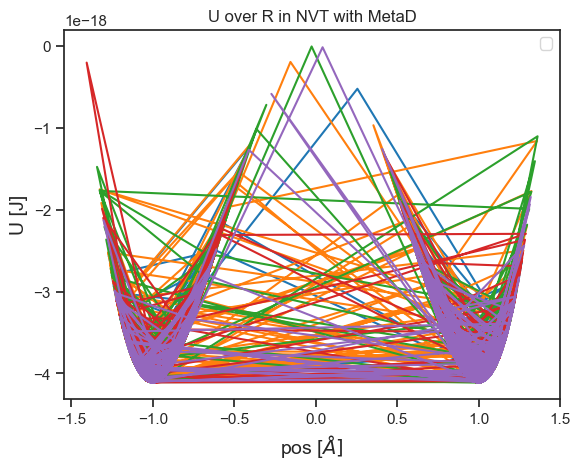

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

for i, seedNum in enumerate([937142, 937143, 937144, 937145, 937146]):
    df = pd.read_csv("simForMetaD_lowDeep" + str(i) + ".log", sep='\s+')
    xyz = open("SimForMetaD_lowDeep" + str(i) + ".xyz", 'r')
    posX, posY, posZ, time = ([] for i in range(4))
    count = 0
    for i in xyz:
        line = i.split()
        if(count % 3 == 1):
            time.append(line[1])
        elif(count % 3 == 2):
            posX.append(float(line[1]))
            posY.append(float(line[2]))
            posZ.append(float(line[3]))
        count += 1
    xyz.close()
    plt.plot(posX, df["U"])

# for i in range(1, len(posX)):
#     if(posX[i -1] * posX[i] < 0):
#         print(time[i])

plt.title("U over R in NVT with MetaD")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")
plt.legend()

### pos vs time

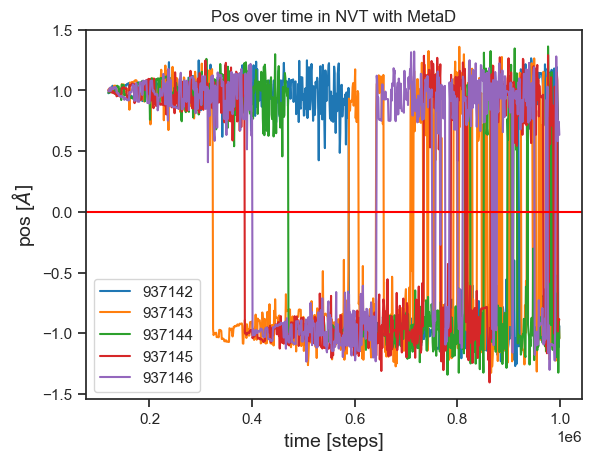

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

for i, seedNum in enumerate([937142, 937143, 937144, 937145, 937146]):
    xyz = open("SimForMetaD_lowDeep" + str(i) + ".xyz", 'r')
    posX, posY, posZ, time = ([] for i in range(4))
    count = 0
    for i in xyz:
        line = i.split()
        if(count % 3 == 1):
            time.append(float(line[1]))
        elif(count % 3 == 2):
            posX.append(float(line[1]))
            # posY.append(float(line[2]))
            # posZ.append(float(line[3]))
        count += 1
    xyz.close()
    plt.plot(time, posX, label=seedNum)

# for i in range(1, len(posX)):
#     if(posX[i -1] * posX[i] < 0):
#         print(time[i])

plt.title("Pos over time in NVT with MetaD")
plt.xlabel("time [steps]")
plt.ylabel(r"pos [$\AA ]$")
plt.axhline(0, color='red')
plt.legend()

## with Poisson distribution

### U vs pos

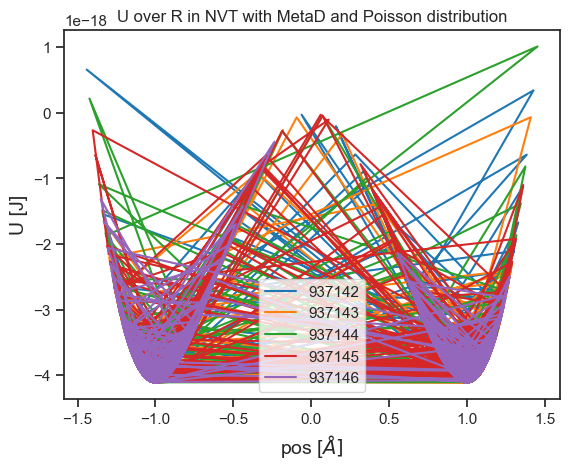

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

for i, seedNum in enumerate([937142, 937143, 937144, 937145, 937146]):
    df = pd.read_csv("simForMetaD_lowWithDistDeep" + str(i) + ".log", sep='\s+')
    xyz = open("SimForMetaD_lowWithDistDeep" + str(i) + ".xyz", 'r')
    posX, posY, posZ, time = ([] for i in range(4))
    count = 0
    for i in xyz:
        line = i.split()
        if(count % 3 == 1):
            time.append(line[1])
        elif(count % 3 == 2):
            posX.append(float(line[1]))
            posY.append(float(line[2]))
            posZ.append(float(line[3]))
        count += 1
    xyz.close()
    plt.plot(posX, df['U'], label=seedNum)

# for i in range(1, len(posX)):
#     if(posX[i -1] * posX[i] < 0):
#         print(time[i])

plt.title("U over R in NVT with MetaD and Poisson distribution")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")
plt.legend()

### pos vs time

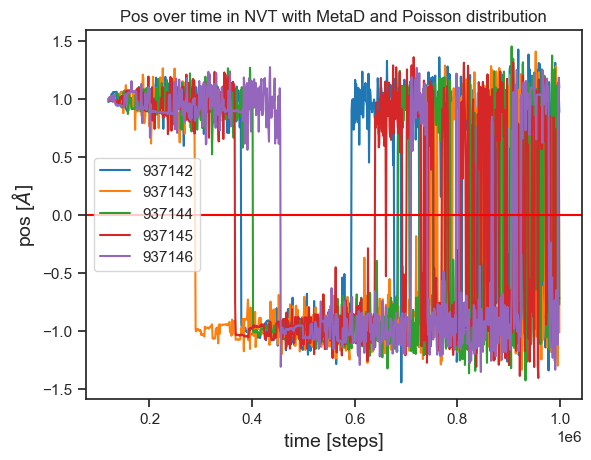

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

for i, seedNum in enumerate([937142, 937143, 937144, 937145, 937146]):
    xyz = open("SimForMetaD_lowWithDistDeep" + str(i) + ".xyz", 'r')
    posX, posY, posZ, time = ([] for i in range(4))
    count = 0
    for i in xyz:
        line = i.split()
        if(count % 3 == 1):
            time.append(float(line[1]))
        elif(count % 3 == 2):
            posX.append(float(line[1]))
            # posY.append(float(line[2]))
            # posZ.append(float(line[3]))
        count += 1
    xyz.close()
    plt.plot(time, posX, label=seedNum)

# for i in range(1, len(posX)):
#     if(posX[i -1] * posX[i] < 0):
#         print(time[i])

plt.title("Pos over time in NVT with MetaD and Poisson distribution")
plt.xlabel("time [steps]")
plt.ylabel(r"pos [$\AA ]$")
plt.axhline(0, color='red')
plt.legend()